<a href="https://colab.research.google.com/github/Poushali11/Classification-prediction/blob/main/INSAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Object - To classify and predict fraudalent transactions based on the historical data.

Business Constraint- Less no of variables available to make decision.

Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
#loading the dataset
frauds= pd.read_csv("/content/Fraud.csv")

In [ ]:
frauds.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
frauds.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,69858.000000,6.985800e+04,6.985800e+04,6.985800e+04,6.985800e+04,6.985700e+04,69857.000000,69857.0
mean,7.893326,1.640176e+05,9.043066e+05,9.202980e+05,8.543522e+05,1.185141e+06,0.001532,0.0
std,1.874512,3.313730e+05,2.791616e+06,2.829881e+06,2.403000e+06,2.871791e+06,0.039107,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.011012e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,4.404918e+04,1.990850e+04,0.000000e+00,1.416050e+04,2.113068e+04,0.000000,0.0
75%,9.000000,1.991307e+05,1.721175e+05,1.940205e+05,5.186073e+05,9.824113e+05,0.000000,0.0
max,9.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [ ]:
frauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB


#Since we are going to build a logistics regression for classification, we must check multicollinearity

In [ ]:
frauds.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.078134,0.006634,0.006257,0.000884,0.015396,-0.051862,nan
amount,0.078134,1.000000,-0.001697,-0.008401,0.268007,0.389110,0.047712,nan
oldbalanceOrg,0.006634,-0.001697,1.000000,0.998970,0.108262,0.075372,-0.004517,nan
newbalanceOrig,0.006257,-0.008401,0.998970,1.000000,0.110352,0.074976,-0.012301,nan
oldbalanceDest,0.000884,0.268007,0.108262,0.110352,1.000000,0.930480,-0.010576,nan
newbalanceDest,0.015396,0.389110,0.075372,0.074976,0.930480,1.000000,-0.007152,nan
isFraud,-0.051862,0.047712,-0.004517,-0.012301,-0.010576,-0.007152,1.000000,nan
isFlaggedFraud,nan,nan,nan,nan,nan,nan,nan,nan


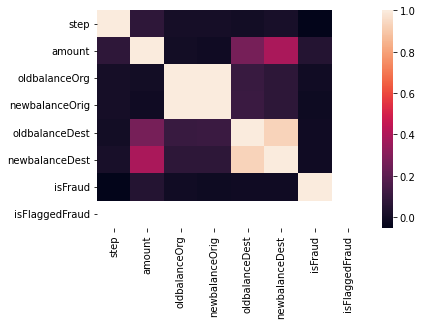

In [ ]:
#let us see the heatmap for better understanding
sns.heatmap(frauds.corr())

In [ ]:
#Checking for missing values
frauds.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

We are having just 3 missing values in 3 different variables, so we can just drop those rows.

In [ ]:
frauds.dropna(subset=['newbalanceDest','isFraud','isFlaggedFraud'],inplace=True)

#Let us check if the dataset is balanced or imbalanced in classification.

In [ ]:
frauds["isFraud"].value_counts()

0.0    69750
1.0      107
Name: isFraud, dtype: int64

In [ ]:
frauds["isFraud"].value_counts(normalize=True)

0.0    0.998468
1.0    0.001532
Name: isFraud, dtype: float64

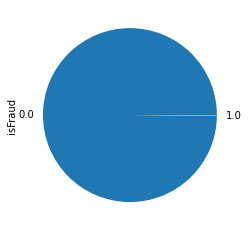

In [ ]:
frauds["isFraud"].value_counts(normalize=True).plot.pie()

The data is heavily imbalanced so we have to do something with it while model building and data splitting.

For now, lets see if there is relationship between the target variable and the independent variables.

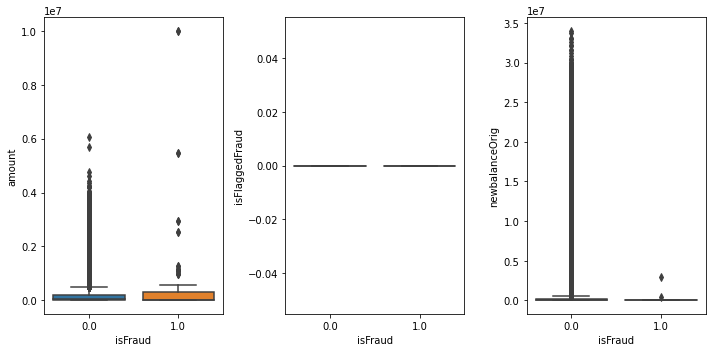

In [ ]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=frauds["isFraud"],y=frauds["amount"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=frauds["isFraud"],y=frauds["isFlaggedFraud"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=frauds["isFraud"],y=frauds["newbalanceOrig"])
plt.tight_layout()
plt.show()

**Feature** **Engineering**

Since nameOrig and nameDest are just the ids of the customer before the transaction and after , we can drop those columns from the model building dataset.

In [ ]:
frauds.drop("nameOrig", inplace=True, axis=1)
frauds.drop("nameDest", inplace=True, axis=1)

In [ ]:
#Converting Categorical columns into one hot encoding
#Create dummy variables
ds=pd.get_dummies(frauds["type"],drop_first=True)
ds
#concat newly created columns with original dataframe
frauds=pd.concat([frauds,ds],axis=1)
#Drop original column
frauds.drop("type",axis=1,inplace=True)

**Model** **Building**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(frauds, frauds["isFraud"], test_size=0.33, random_state=42)

Since data is highly imbalanced , we are adding weights to the logistic regression model

In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})
# train model to learn relationships between input and output variables
lr_basemodel.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [ ]:
y_pred_basemodel = lr_basemodel.predict(x_test)

In [ ]:
#Measuring the model with F1 score
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred_basemodel))

f1 score for base model is :  0.15873015873015875


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_basemodel)
print(confusion_matrix)

[[36510    22]
 [   31     5]]


In [ ]:
accuracy_score = (36510+5)/36568
print(accuracy_score)

0.9985506453730038


Since model is giving 99.8 % accuracy , we don't need hyperparameter tuning.

This model can be deployed to predict fraud transactions , however more data variables can reduce bias in predicting fraud transactions.